In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns

In [44]:
#Import vaccination data from google api
vac_df = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/latest/vaccinations.csv')

In [22]:
#function formats the google dataframes - see below for input formats
def google_format(df,key,filt,length,columns,drop_values): #key, filt -> str; length -> int; columns, drop_values -> list
    df = df.dropna(subset=[key])
    df = df[df[key].str.contains(filt)]
    mask = (df[key].str.len() == length)
    df = df.loc[mask]
    df = df[columns]
    df = df[~df[key].isin(drop_values)]
    df.reset_index(drop = True, inplace = True)
    return df

In [23]:
#Input values for vaccination data
drop = ['US_AS','US_GU','US_MP','US_PR','US_VI']
cols = ['date','location_key','cumulative_persons_fully_vaccinated','new_persons_vaccinated','new_persons_fully_vaccinated']
loc_key = 'location_key'
contains = 'US_'

In [24]:
#formatting vaccination data
vac_df = google_format(vac_df, loc_key, contains, 5, cols, drop)

In [28]:
#reading demographic data
dem_df = pd.read_csv('demographics.csv')

In [29]:
dcols = ['location_key','population']

In [30]:
#formatting demographic data
dem_df = google_format(dem_df, loc_key, contains, 5, dcols, drop)

In [31]:
#reading epidemeology data
epi_df = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/latest/epidemiology.csv')

In [32]:
ecols = ['location_key','cumulative_confirmed','cumulative_deceased','cumulative_recovered']

In [33]:
#formatting epidemeology data
epi_df = google_format(epi_df, loc_key, contains, 5, ecols, drop)

In [35]:
loc_key = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/location/US.csv')

In [60]:
AK_vac_df = US_vac_df[US_vac_df['location_key'].str.contains('US_AK')]

In [69]:
AK_total = AK_vac_df['cumulative_persons_fully_vaccinated'].iloc[1:len(AK_vac_df)].sum()
AK_total

451708.0

In [178]:
#we don't need this at the moment, can be skipped
def swap_rows(df, i1, i2): #Keep this!!!
    a, b = df.iloc[i1, :].copy(), df.iloc[i2, :].copy()
    df.iloc[i1, :], df.iloc[i2, :] = b, a
    return df

In [34]:
#merging dataframes
total_df = vac_df.merge(dem_df, how = 'inner',on = 'location_key')

In [35]:

total_df['percent_fully_vaccinated'] = (total_df['cumulative_persons_fully_vaccinated']/total_df['population'])*100
total_df.sort_values('percent_fully_vaccinated', ascending = False)

,date,location_key,cumulative_persons_fully_vaccinated,new_persons_vaccinated,new_persons_fully_vaccinated,population,percent_fully_vaccinated
39,2022-09-15,US_RI,900147.0,0.0,0.0,1097379.0,82.026993
7,2022-09-15,US_DC,557746.0,0.0,0.0,689545.0,80.886092
46,2022-09-15,US_VT,517353.0,0.0,0.0,643077.0,80.449620
21,2022-09-15,US_ME,1092647.0,0.0,0.0,1362359.0,80.202575
6,2022-09-15,US_CT,2881218.0,0.0,0.0,3605944.0,79.901906
19,2022-09-15,US_MA,5573783.0,0.0,0.0,7029917.0,79.286612
11,2022-09-15,US_HI,1129082.0,0.0,0.0,1455271.0,77.585687
20,2022-09-15,US_MD,4677823.0,0.0,0.0,6177224.0,75.726945
34,2022-09-15,US_NY,15272806.0,0.0,0.0,20201249.0,75.603276
45,2022-09-15,US_VA,6372093.0,0.0,0.0,8631393.0,73.824619


In [36]:
#merging dataframes
total_df = total_df.merge(epi_df, how = 'inner',on = 'location_key')

In [37]:
total_df

,date,location_key,cumulative_persons_fully_vaccinated,new_persons_vaccinated,new_persons_fully_vaccinated,population,percent_fully_vaccinated,cumulative_confirmed,cumulative_deceased,cumulative_recovered
0,2022-09-15,US_AK,463635.0,0.0,0.0,733391.0,63.217983,302448.0,1321.0,7165.0
1,2022-09-15,US_AL,2558655.0,0.0,0.0,5024279.0,50.925814,1511092.0,20321.0,295690.0
2,2022-09-15,US_AR,1678989.0,0.0,0.0,3011524.0,55.752137,943944.0,11970.0,315517.0
3,2022-09-15,US_AZ,4597005.0,0.0,0.0,7151502.0,64.280273,2264159.0,31244.0,NaN
4,2022-09-15,US_CA,29060326.0,0.0,0.0,39538223.0,73.499322,11171759.0,95620.0,NaN
5,2022-09-15,US_CO,4125180.0,0.0,0.0,5773714.0,71.447599,1649212.0,13426.0,NaN
6,2022-09-15,US_CT,2881218.0,0.0,0.0,3605944.0,79.901906,885767.0,11317.0,9800.0
7,2022-09-15,US_DC,557746.0,0.0,0.0,689545.0,80.886092,103487.0,1382.0,34985.0
8,2022-09-15,US_DE,690769.0,0.0,0.0,989948.0,69.778312,305284.0,3080.0,18851.0
9,2022-09-15,US_FL,14648767.0,0.0,0.0,21538187.0,68.012999,7082717.0,80647.0,NaN


In [38]:
total_df['percent_death_rate_by_case'] = (total_df['cumulative_deceased']/total_df['cumulative_confirmed'])*100

In [39]:
total_df['percent_death_rate_per_capita'] = (total_df['cumulative_deceased']/total_df['population'])*100

In [40]:
total_df

,date,location_key,cumulative_persons_fully_vaccinated,new_persons_vaccinated,new_persons_fully_vaccinated,population,percent_fully_vaccinated,cumulative_confirmed,cumulative_deceased,cumulative_recovered,percent_death_rate_by_case,percent_death_rate_per_capita
0,2022-09-15,US_AK,463635.0,0.0,0.0,733391.0,63.217983,302448.0,1321.0,7165.0,0.436769,0.180122
1,2022-09-15,US_AL,2558655.0,0.0,0.0,5024279.0,50.925814,1511092.0,20321.0,295690.0,1.344789,0.404456
2,2022-09-15,US_AR,1678989.0,0.0,0.0,3011524.0,55.752137,943944.0,11970.0,315517.0,1.268084,0.397473
3,2022-09-15,US_AZ,4597005.0,0.0,0.0,7151502.0,64.280273,2264159.0,31244.0,NaN,1.379938,0.436887
4,2022-09-15,US_CA,29060326.0,0.0,0.0,39538223.0,73.499322,11171759.0,95620.0,NaN,0.855908,0.241842
5,2022-09-15,US_CO,4125180.0,0.0,0.0,5773714.0,71.447599,1649212.0,13426.0,NaN,0.814086,0.232537
6,2022-09-15,US_CT,2881218.0,0.0,0.0,3605944.0,79.901906,885767.0,11317.0,9800.0,1.277650,0.313843
7,2022-09-15,US_DC,557746.0,0.0,0.0,689545.0,80.886092,103487.0,1382.0,34985.0,1.335433,0.200422
8,2022-09-15,US_DE,690769.0,0.0,0.0,989948.0,69.778312,305284.0,3080.0,18851.0,1.008897,0.311127
9,2022-09-15,US_FL,14648767.0,0.0,0.0,21538187.0,68.012999,7082717.0,80647.0,NaN,1.138645,0.374437


In [41]:
#function for regression plots
def reg(df,x,y,x_text,y_text):    
    lm = st.linregress(x = df[x], y = df[y])
    data_fit = lm[0]*df[x] + lm[1]
    fit_df = pd.DataFrame({'x': df[x], 'fitted': data_fit})
    ax = sns.scatterplot(data = df, x = x, y = y)
    #ax = df.plot.scatter(y = y, x = x, s = 30)
    print(f"The r-value is: {lm[2]}")
    fit_df.plot.line(x = 'x', y = 'fitted', color = 'red', ax=ax, legend = None, xlabel = x)
    plt.text(x_text,y_text,f"y = {'%.2f' %lm[0]}x + {'%.1f' %lm[1]}", color = 'red', fontsize = 16)

The r-value is: -0.3365701397470186


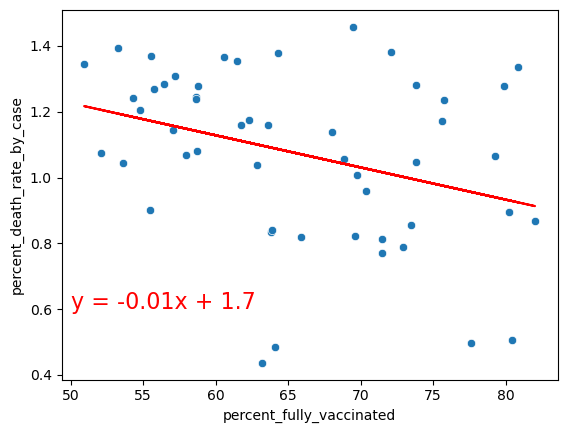

In [82]:
reg(total_df,'percent_fully_vaccinated','percent_death_rate_by_case',50,0.6)

The r-value is: -0.5461008665715601


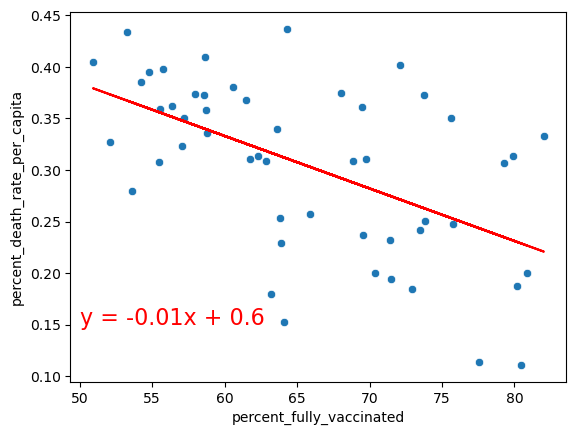

In [83]:
reg(total_df,'percent_fully_vaccinated','percent_death_rate_per_capita',50,0.15)

The r-value is: 0.07111398893098148


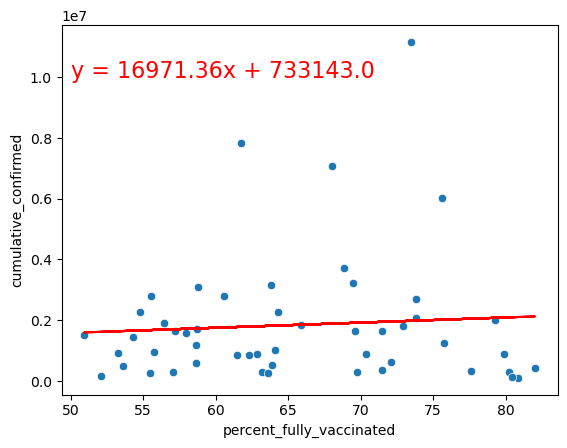

In [84]:
reg(total_df,'percent_fully_vaccinated','cumulative_confirmed',50,10000000)